In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()

### Gambler’s ruin

In [4]:
n = 10
p = 1/2
nsim = 80

In [5]:
x = np.zeros(nsim)
x[0] = 5

In [6]:
for i in range(1, 80):
    if x[i-1] == 0 or x[i-1] == n:
        x[i] = x[i-1]
    else:
        x[i] = x[i-1] + np.random.choice([-1, 1], 1, p=[p, 1-p])

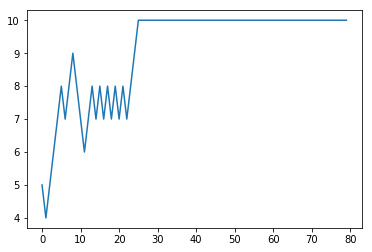

In [7]:
plt.plot(x)

## Simulating from a finite-state Markov chain

<img src="img/4-state_Markov chain.jpg">

In [28]:
# the transition matrix of 4 state Markov chain
Q = np.array([[1/3,1/3,1/3,0], [0,0,1/2,1/2], [0,1,0,0], [1/2,0,0,1/2]])
Q

array([[0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ]])

#### 1. Starting at state 1, after 5 steps, reach at state 3, compute the probability:

In [26]:
# 5-step transition matrix
Q_5 = np.linalg.matrix_power(Q, 5)
Q_5

array([[0.219393  , 0.26183128, 0.21399177, 0.30478395],
       [0.20023148, 0.19675926, 0.28703704, 0.31597222],
       [0.25694444, 0.40277778, 0.11111111, 0.22916667],
       [0.19251543, 0.30478395, 0.2191358 , 0.28356481]])

In [31]:
# 1->3
Q_5[0, 2]

0.21399176954732507

#### 2. Marginal distribution of $X_5$ 

In [30]:
# initial condition
t = np.array([1/4, 1/4, 1/4, 1/4])
t

array([0.25, 0.25, 0.25, 0.25])

In [36]:
# the marginal distribution of $X_5$
X5_pmf = t.dot(Q_5)
X5_pmf

array([0.21727109, 0.29153807, 0.20781893, 0.28337191])

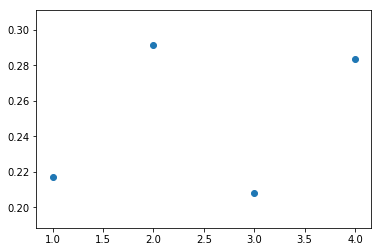

In [40]:
plt.scatter(range(1, 5), X5_pmf)

In [10]:
N = Q.shape[0]

nsim = 10**5 # the number of time periods
x = np.zeros(nsim)
x[0] = np.random.choice(range(1, N), 1)
x[0]

2.0

In [11]:
for i in range(1,nsim):
    x[i] = np.random.choice(range(0, N), 1, p=Q[int(x[i-1]), ])

In [12]:
x = x[range(int(nsim/2), nsim), ]

In [13]:
import pandas
 
ps = pandas.Series(x)
counts = ps.value_counts()
counts / len(x)

3.0    0.286734
1.0    0.285662
2.0    0.214380
0.0    0.213224
dtype: float64

In [55]:
import sympy
sympy.init_printing()

In [95]:
Q_rainy = sympy.Matrix([[1/3, 2/3], [1/2, 1/2]])

In [71]:
sympy.solve(S *Q - S, s)

In [150]:
n = [10, 100, 1000, 10000]
results = {}
for i in n:
    l = sympy.MatPow(Q_rainy, i)
    results[i] = l.doit()

In [159]:
results

⎧10: ⎡0.428571438021812  0.571428561978187⎤, 100: ⎡0.428571428571427  0.571428
⎨    ⎢                                    ⎥       ⎢                           
⎩    ⎣0.428571421483641  0.571428578516359⎦       ⎣0.428571428571427  0.571428

57142857⎤, 1000: ⎡0.428571428571418  0.571428571428558⎤, 10000: ⎡0.42857142857
        ⎥        ⎢                                    ⎥         ⎢             
57142857⎦        ⎣0.428571428571418  0.571428571428558⎦         ⎣0.42857142857

1325  0.571428571428433⎤⎫
                       ⎥⎬
1324  0.571428571428433⎦⎭

In [156]:
S = sympy.Matrix([[3/7, 4/7], [3/7, 4/7]])
S

⎡0.428571428571429  0.571428571428571⎤
⎢                                    ⎥
⎣0.428571428571429  0.571428571428571⎦

In [172]:
results[10] - S

⎡9.45038375332885e-9  -9.4503839198623e-9⎤
⎢                                        ⎥
⎣-7.0877879676523e-9  7.08778780111885e-9⎦